# Gaussian Distribution

## Overview

In real world we are not 100% accurate in states that we measure via sensors or predict via system models. There are always degree of uncertainty in what we estimate. Assuming 100% confidence in what we estimate could lead to critical problems.

In order to model the real belief in the state estimate, an uncertainty model must be used. This uncertainty means that we are not assuming an exact value for the state but instead a range of values where we think that the actual state value lies within.

**Example:** 

**Instead of saying that I predict a value to be exact $2$, I say that its $2 \pm 0.5$ which means that I think that the predicted or measured value lies in the range of values $[1.5, 2.5]$.**

## Exact Values

Here we plot an exact value that we assume we measured to get the feeling of how things look like visually.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
def make_figure(xlims=None):
    figure, ax = plt.subplots(figsize=(30, 10))

    ax.axvline(c='grey', lw=2)
    ax.axhline(c='grey', lw=2)

    ax.grid(visible=True)

    ax.set_xlabel('position x (m)', fontsize=30)
    ax.set_ylabel('p(x)', fontsize=30)

    if (xlims != None):
        ax.set_xlim(xlims[0], xlims[1])

    return figure, ax

def add_absolute_position(ax, x, p, color, set_label=True):
    label = ''
    if (set_label == True):
        label=f'x={x}'
        
    ax.vlines(x, 0, p, color=color, label=label, linewidths=5)
    
def update_plot():
    plt.legend(prop={'size': 30})
    plt.show()

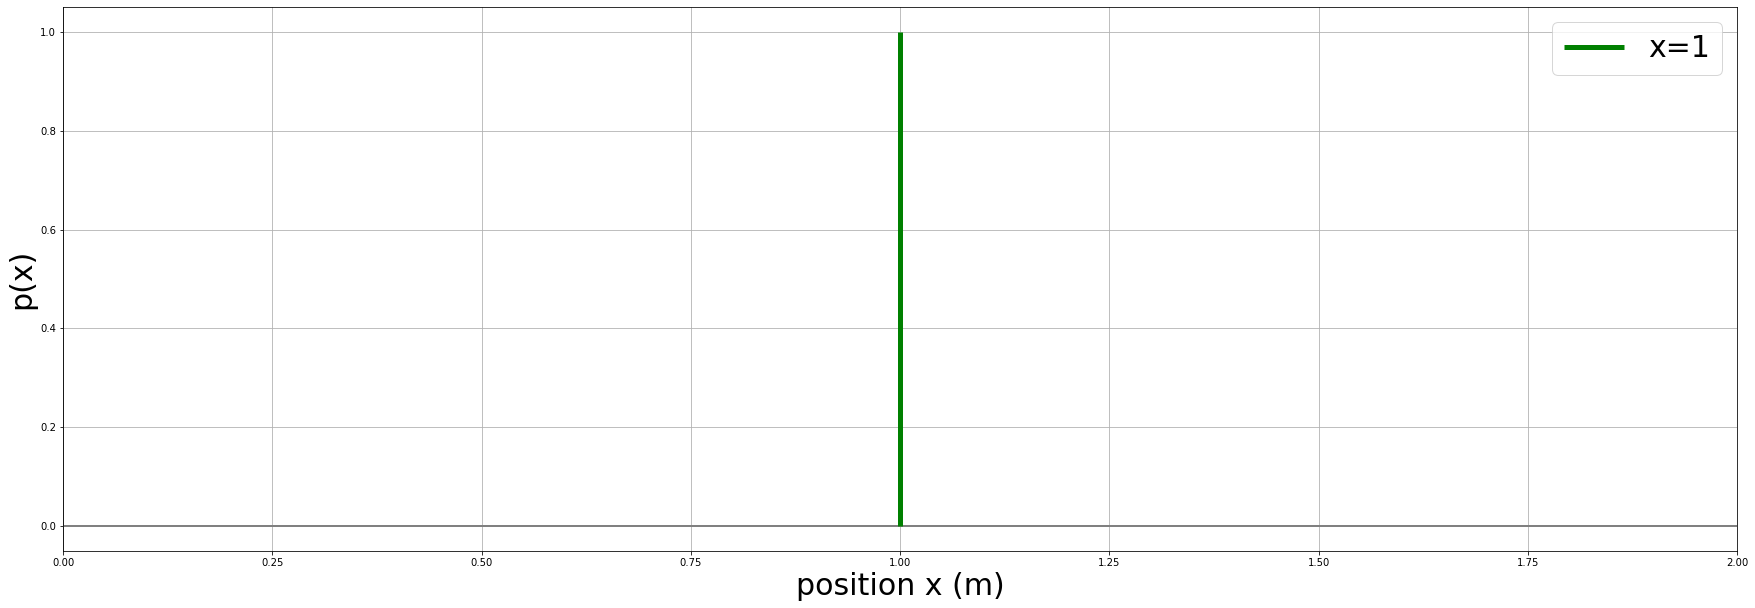

In [51]:
x0 = 1

fig, ax = make_figure(xlims=(0, 2))
add_absolute_position(ax, x0, 1, 'green')
update_plot()

where $p(x)$ in y-axis stands for the belief percentage in the state $x$. And in that case, the $p(x)$ would be $1$ because we are 100% sure that this is the correct value.

As we explained in the overview section above, assuming an exact measurement from a sensor or a model is not realistic because all sensors which manufactured has certain degree of errorness which could be illustrated in the datasheet of sensor when you buy it or could even be variable and sensitive to to physical conditions like eg. temperature.

This will lead us to assume that the measurements are not exact and this belief must be modeled in a mathematical form. The Gaussian distribution or sometimes also called Normal distribution is the belief mathematical model of choice for most of the modern robotics applications because of its simplicity.

## Gaussian PDF

One of the most and simplest models to express the uncertainty in belief is the Gaussian distribution (Normal Distribution).

The reason for this is that Gaussian distribution model has only two parameters which are the mean and variance. And sometimes the standard deviation term is used instead of variance which is basically its square root $\sigma_{std} = \sqrt{\sigma^2_{std}}$

The Gaussian's probability density function (pdf) is:

$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp^{\frac{1}{2}\left( \frac{(x-\bar{x})^2}{\sigma^2} \right)}
$$

where; $\sigma^2$ is the variance, $\bar{x}$ is mean of the distribution. $x$ is the sample of interest which lies inside the distribution.

We can express a state which is normally (Gaussian) distributed as:

$$
x = \mathcal{N}(\bar{x}, \sigma^2)
$$

where $\mathcal{N}(...)$ stands for Normal distribution.

Now, lets visualize the normal distribution in 1-D space and understand what does it mean.

In [52]:
def gaussian_pdf(x, mu, var):
    return (1. / np.sqrt(2. * np.pi * var)) * np.exp(-0.5 * (x - mu)**2 / var)

def generate_normal_samples(mu, var, sigma_num=3, num=300):
    '''
    generate normally distributed 1D [samples, pdfs] such that the mean value
    is included as well in the middle index of the array.
    '''
    sigma = np.sqrt(var)
    sigma_3 = sigma_num * sigma
    x = np.linspace(mu - sigma_3, mu + sigma_3, num)
    middle_idx = int(num / 2)
    x = np.insert(x, middle_idx, mu) # add the mean value to the samples in the correct order of points (middle)
    p = gaussian_pdf(x, mu, var)
    return x, p

def add_gaussian_bel(ax, x, var, color, visualize_details=False):
    p = gaussian_pdf(x, x, var)
    add_absolute_position(ax, x, p, color, False)
    
    x_bel, p_bel = generate_normal_samples(x, var)
    ax.plot(x_bel, p_bel, color=color, label=f'x={round(x, 2)}, var={round(var, 2)}')
    
    if visualize_details == True:
        sigma = np.sqrt(var)
        sigma1_range = (x - sigma, x + sigma)      # sigma 1 x-range
        sigma2_range = (x - sigma*2, x + sigma*2)  # sigma 2 x-range
        sigma3_range = (x - sigma*3, x + sigma*3)  # sigma 3 x-range
        
        # fill sigma 1 area
        ax.fill_between(x_bel, p_bel, where=((x_bel >= sigma1_range[0]) & (x_bel <= sigma1_range[1])), color='C0', alpha=0.3)
        
        # fill sigma 2 areas
        ax.fill_between(x_bel, p_bel, where=((x_bel >= sigma2_range[0]) & (x_bel <= sigma1_range[0])), color='C1', alpha=0.3)
        ax.fill_between(x_bel, p_bel, where=((x_bel <= sigma2_range[1]) & (x_bel >= sigma1_range[1])), color='C1', alpha=0.3)
        
        # fill sigma 3 areas
        ax.fill_between(x_bel, p_bel, where=((x_bel >= sigma3_range[0]) & (x_bel <= sigma2_range[0])), color='C2', alpha=0.3)
        ax.fill_between(x_bel, p_bel, where=((x_bel <= sigma3_range[1]) & (x_bel >= sigma2_range[1])), color='C2', alpha=0.3)
        
        # arrow marking sigma 1 area
        ax.arrow(x, -0.25, sigma1_range[0], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        ax.arrow(x, -0.25, sigma1_range[1], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        
        # arrow marking sigma 2 area
        ax.arrow(x, -0.5, sigma2_range[0], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        ax.arrow(x, -0.5, sigma2_range[1], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        
        # arrow marking sigma 3 area
        ax.arrow(x, -0.75, sigma3_range[0], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        ax.arrow(x, -0.75, sigma3_range[1], 0, head_length=0.01, head_width = 0.05, width = 0.01, length_includes_head = True)
        
        # area covered by sigma 1
        ax.text(x, -(0.25-0.05), "68.27%", fontsize=20)
        
        # area covered by sigma 2
        ax.text(x, -(0.5-0.05), "95.45%", fontsize=20)
        
        # area covered by sigma 3
        ax.text(x, -(0.75-0.05), "99.73%", fontsize=20)

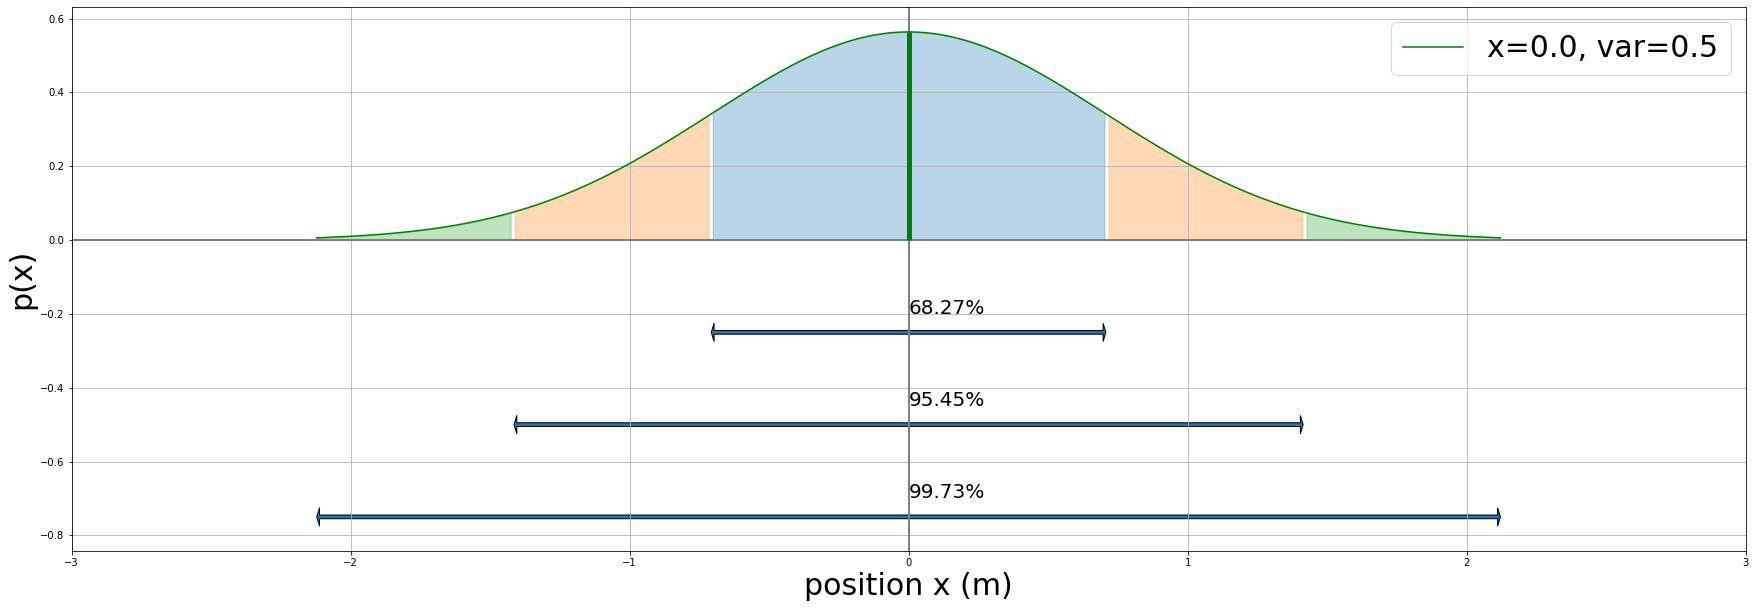

In [53]:
fig, ax = make_figure(xlims=(-3, 3))

add_gaussian_bel(ax, 0.0, 0.5, 'green', visualize_details=True)

update_plot()

To understand more about the standard deviation ($\sqrt{\sigma^2} = \sigma$), I created the above figure. It is shown there the distribution areas covered by $1\sigma$, $2\sigma$, and $3\sigma$.

The blue area of $1\sigma$ covers 68.27% of the whole bell-shape area of the normal distribution, the orange area of $2\sigma$ covers 95.45%, and the green area of $3\sigma$ covers 99.73%.

In another way, this means that $\pm 1\sigma$ is the area where we think that 68.27% of the randomly distributed samples or guesses lie within. And for $\pm 2 \sigma$ area 95.45% of the samples or guesses lies within the area from the mean to it.

In the normal distribution, the mean has the highest probability $p(x)$ to be correct expectation. The far you go away from the mean the less probability you get which actually makes sense. The probability decrease exponentially which makes the model even better as the far I go away from mean I need to have more reduction in probability.

The next aspect to observe is that the more uncertainty you have (more $\sigma^2$) the less the peak probability at the mean is.

In the below exercise, we try to overlap several plots of gaussian curves with difference variances to observe how the peak probability $p(x)$ at the mean changes.

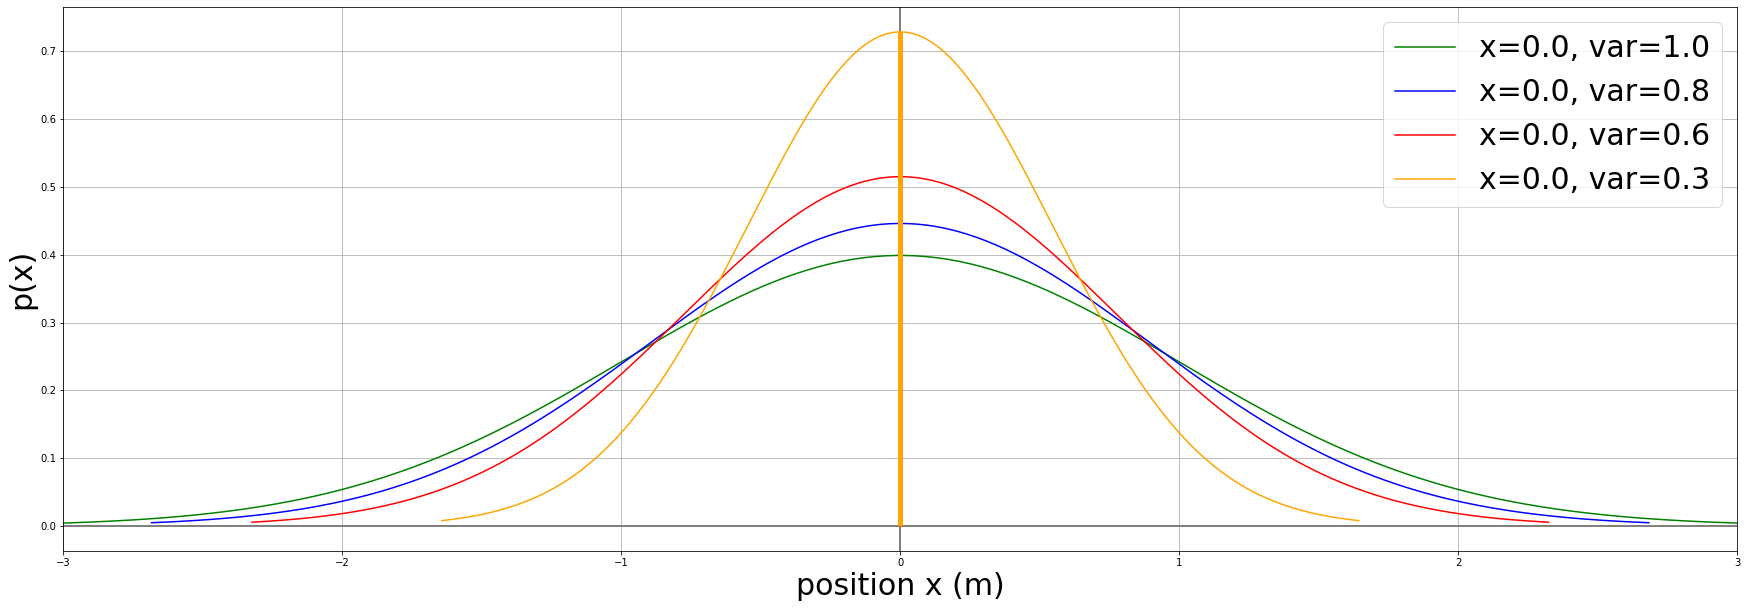

In [54]:
fig, ax = make_figure(xlims=(-3, 3))

add_gaussian_bel(ax, 0.0, 1.0, 'green')
add_gaussian_bel(ax, 0.0, 0.8, 'blue')
add_gaussian_bel(ax, 0.0, 0.6, 'red')
add_gaussian_bel(ax, 0.0, 0.3, 'orange')

update_plot()

As we see in the above figure, the less the variance is the more the mean probability is $p(\mu)$ which makes totally sense, as the more certain we are in our estimate or measurement, the more confidence or probability of occurance we give to the mean value.

## Example

Lets think of an example of having a robot moving in 1-D space.

The model to predict the robot next position based on the current position and speed is:

$$
x_{t} = x_{t-1} + v_{t-1} \Delta{T}
$$

$$
v_{t} = v_{t-1}
$$

this is known as constant velocity model, since the velocity state is always assumed to be constant and equal to velocity at previous time.

where; $x$ and $v$ are position and velocity, respectively. $\Delta{T}$ is the sampling time.

Lets assume that {$x_{t-1}=2m$}, {$v_{t-1}=2 \frac{m}{s}$} and {$\Delta T=1s$}.

Then the result is:

$$
\begin{align}
x_{t1} &= x_{t0} + v_{t0} \\
       &= 2 + 2 \\
       &= 4 m
\end{align}
$$

In this example we predicted the new position but we didn't consider any uncertainty in our belief. Hence, the positions are absolute and exact values without any errors.

In [55]:
inf = 100000.

x0 = 2 # initial position
v0 = 2 # initial velocity

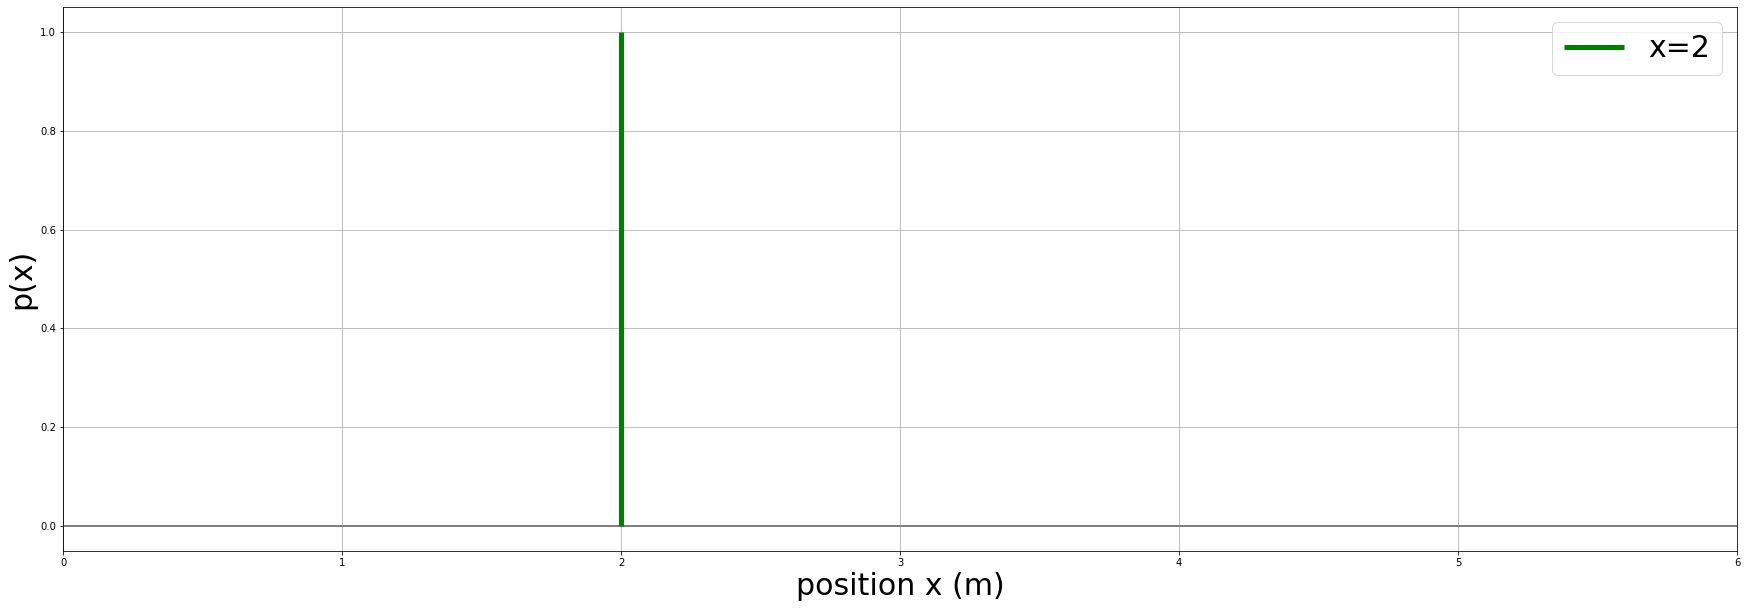

In [56]:
fig, ax = make_figure(xlims=(0, 6))
add_absolute_position(ax, x0, 1, 'green')
update_plot()

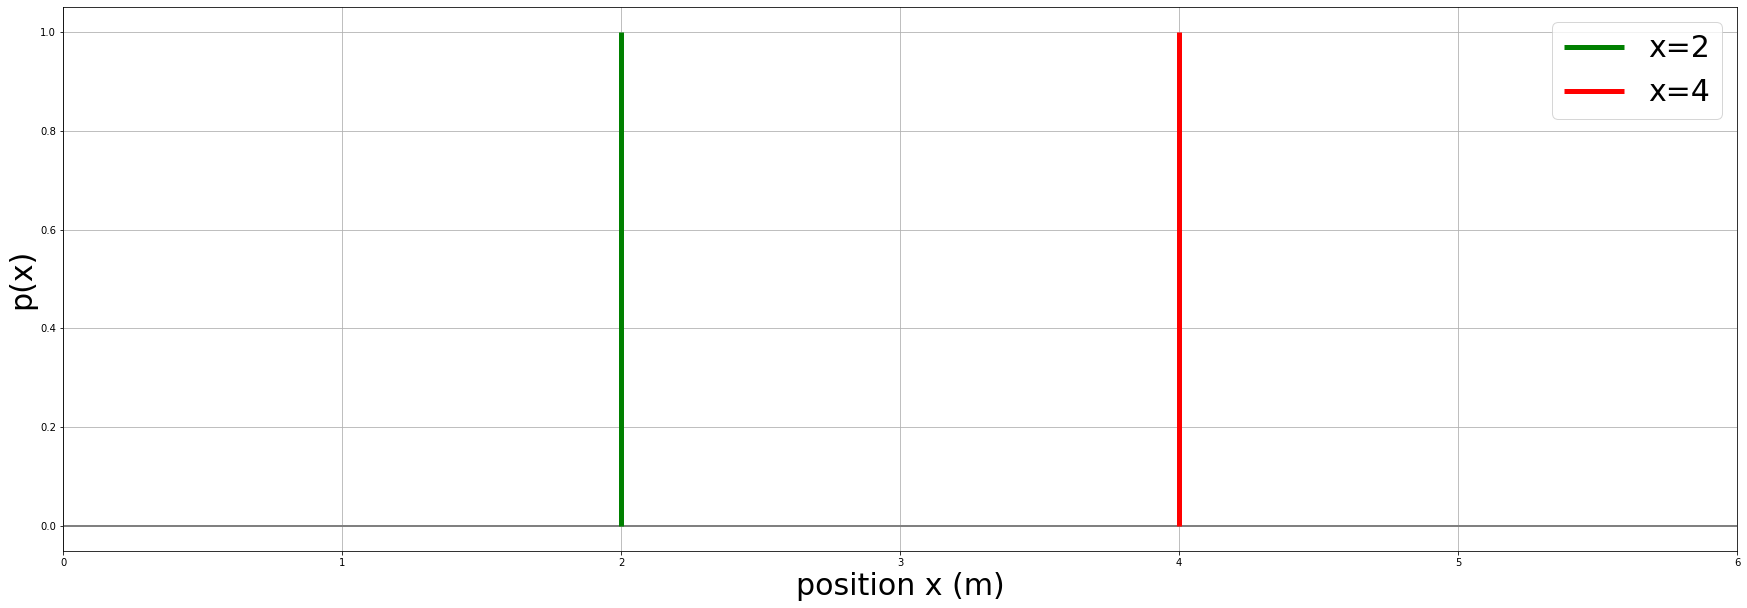

In [57]:
x0 = 2 # initial position
v0 = 2 # initial velocity

x1 = x0 + v0 # position at t1

fig, ax = make_figure(xlims=(0, 6))

add_absolute_position(ax, x0, 1, 'green')
add_absolute_position(ax, x1, 1, 'red')

update_plot()

In order to respect and consider the uncertainty in our system model, we represent the position state as normal distribution.

Additionally, we also propagate the error uncertainty to the gaussian state.

$$
x_{t1} = x_{t0} + v_{t0}
$$

$$
\sigma^2_{t1} = \sigma^2_{t0} + q
$$

In [58]:
noise_var = 0.1
var0 = 0.1

x1 = x0 + v0 # position at t1
var1 = var0 + noise_var # position at t1

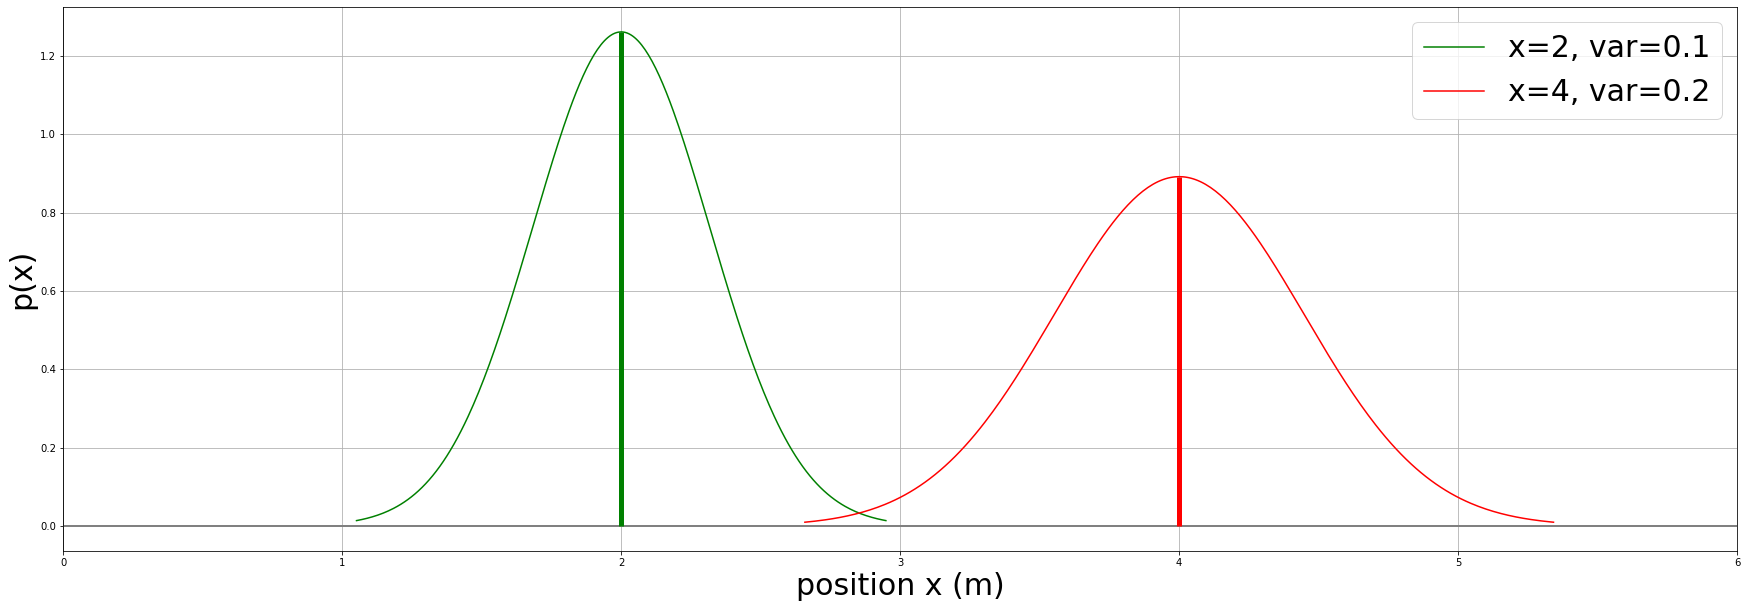

In [59]:
fig, ax = make_figure(xlims=(0, 6))

add_gaussian_bel(ax, x0, var0, 'green')
add_gaussian_bel(ax, x1, var1, 'red')

update_plot()

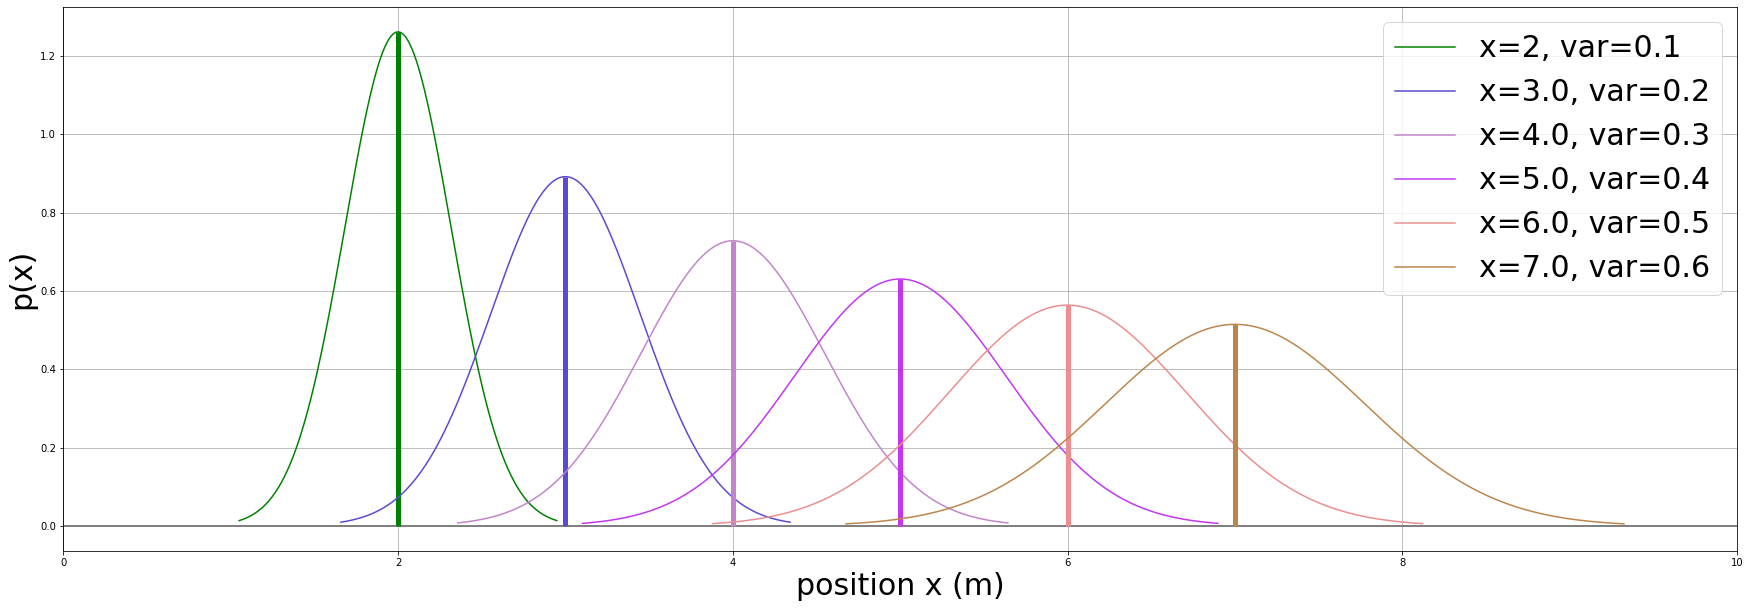

In [60]:
x = 2
p = 0.1
v = 1.0
noise = 0.1

iterations = 5

# generate list of random colors for each iteration
color = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(iterations)]

fig, ax = make_figure(xlims=(0, 10))

add_gaussian_bel(ax, x, p, 'green')

for i in range(iterations):
    x = x + v
    p = p + noise
    
    add_gaussian_bel(ax, x, p, color[i])

update_plot()

## Calculate Normal Distribution from Samples

In order to calculate the mean and variance of a set of samples, we should these steps:

1. Calculate the mean of the samples by averaging them.

$$
\bar{x} = \frac{1}{N} \sum_{i=0}^{N} x_i \ \ ; \ \ i = 0, 1,\dots , N
$$

2. Calculate the square of sum of the samples deviation from the calculated mean from step (1).

$$
\sigma^2 = \frac{1}{N} \sum_{i=0}^{N} (x_i - \bar{x})^2 \ \ ; \ \ i = 0, 1,\dots , N
$$

The generalization of these equations in matrix form would be:

$$
\vec{x} = \frac{1}{N} \sum_{i=0}^{N} \vec{x}_i \ \ ; \ \ i = 0, 1,\dots , N
$$

$$
P = \frac{1}{N} \sum_{i=0}^{N} (\vec{x}_i - \vec{x})(\vec{x}_i - \vec{x})^T \ \ ; \ \ i = 0, 1,\dots , N
$$


In [61]:
class Gaussian(object):
    def __init__(self, samples):
        self.x = self.calculate_mean(samples)
        self.P = self.calculate_covariance(samples)
        
    def calculate_mean(self, samples):
        x = 0.0
        for x_i in samples:
            x += x_i
        x /= len(samples)
        return x
    
    def calculate_covariance(self, samples):
        P = 0.0
        for x_i in samples:
            P += (x_i - self.x)**2
        P /= len(samples)
        return P

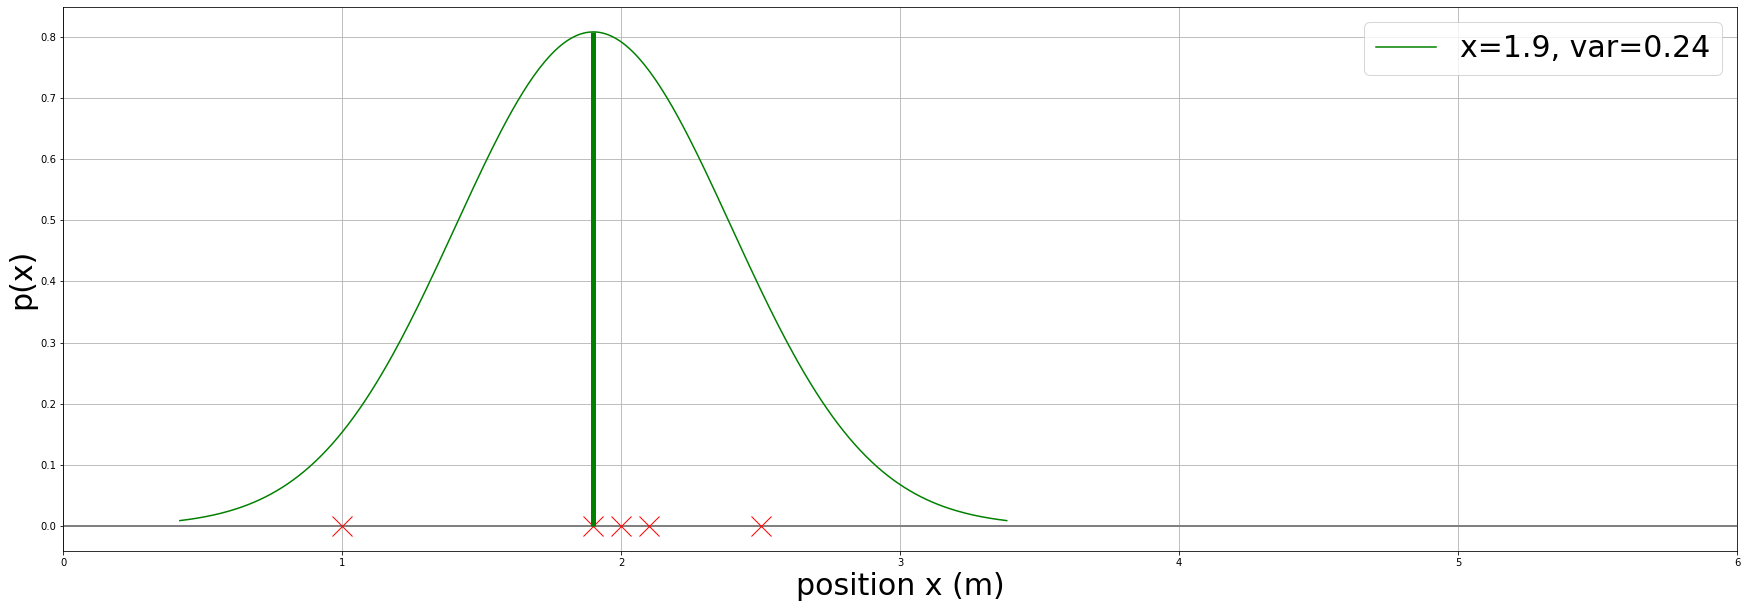

In [62]:
samples = [2.0, 2.1, 1.9, 1.0, 2.5] # add samples in a list

gaussian = Gaussian(samples) # calculate the mean and covariance out of these samples

fig, ax = make_figure(xlims=(0, 6)) # create figure

ax.plot(samples, np.zeros((len(samples), 1)), 'x', markersize=20, color='red') # plot samples

add_gaussian_bel(ax, gaussian.x, gaussian.P, 'green') # plot gaussian distribution

update_plot()

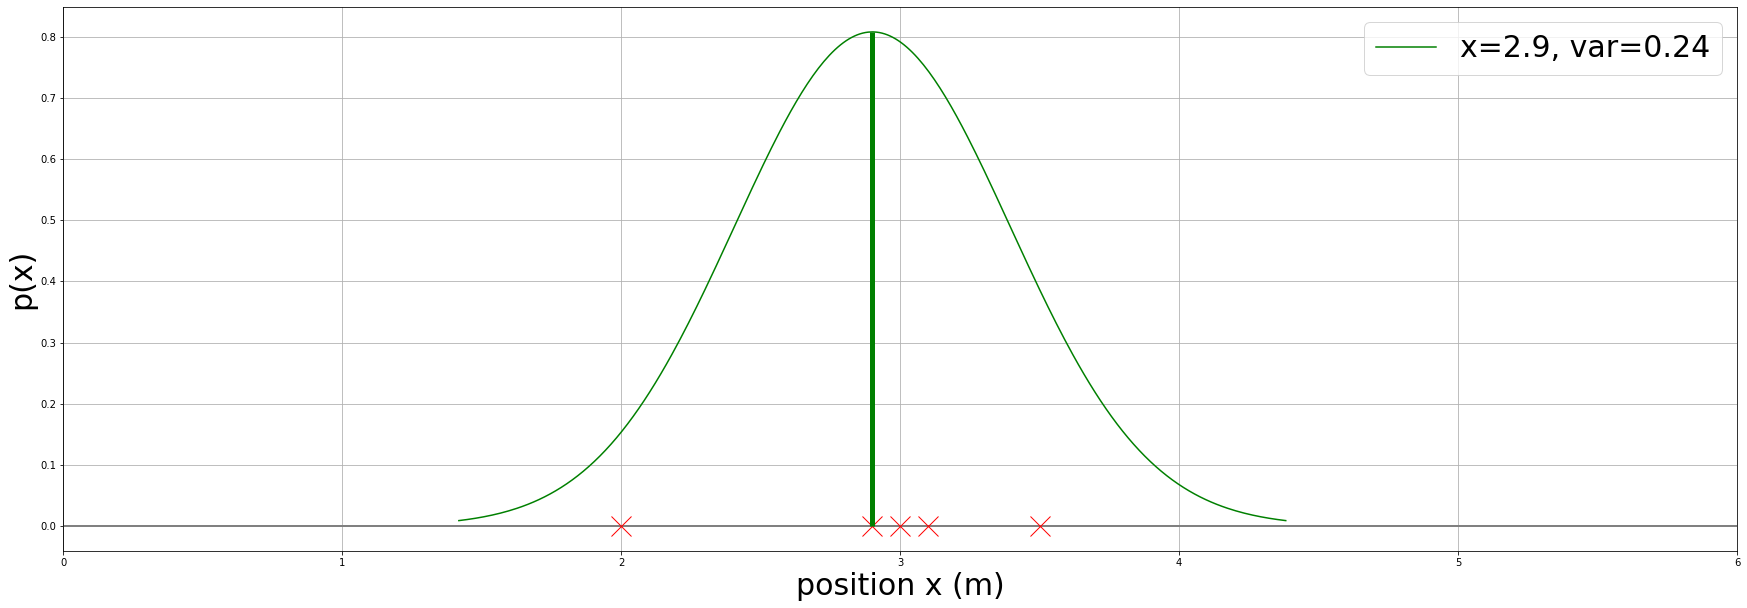

In [63]:
samples = [2.0, 2.1, 1.9, 1.0, 2.5] # add samples in a list
samples = np.add(samples, 1.) # shift the samples by 1

gaussian = Gaussian(samples) # calculate the mean and covariance out of these samples

fig, ax = make_figure(xlims=(0, 6)) # create figure

ax.plot(samples, np.zeros((len(samples), 1)), 'x', markersize=20, color='red') # plot samples

add_gaussian_bel(ax, gaussian.x, gaussian.P, 'green') # plot gaussian distribution

update_plot()

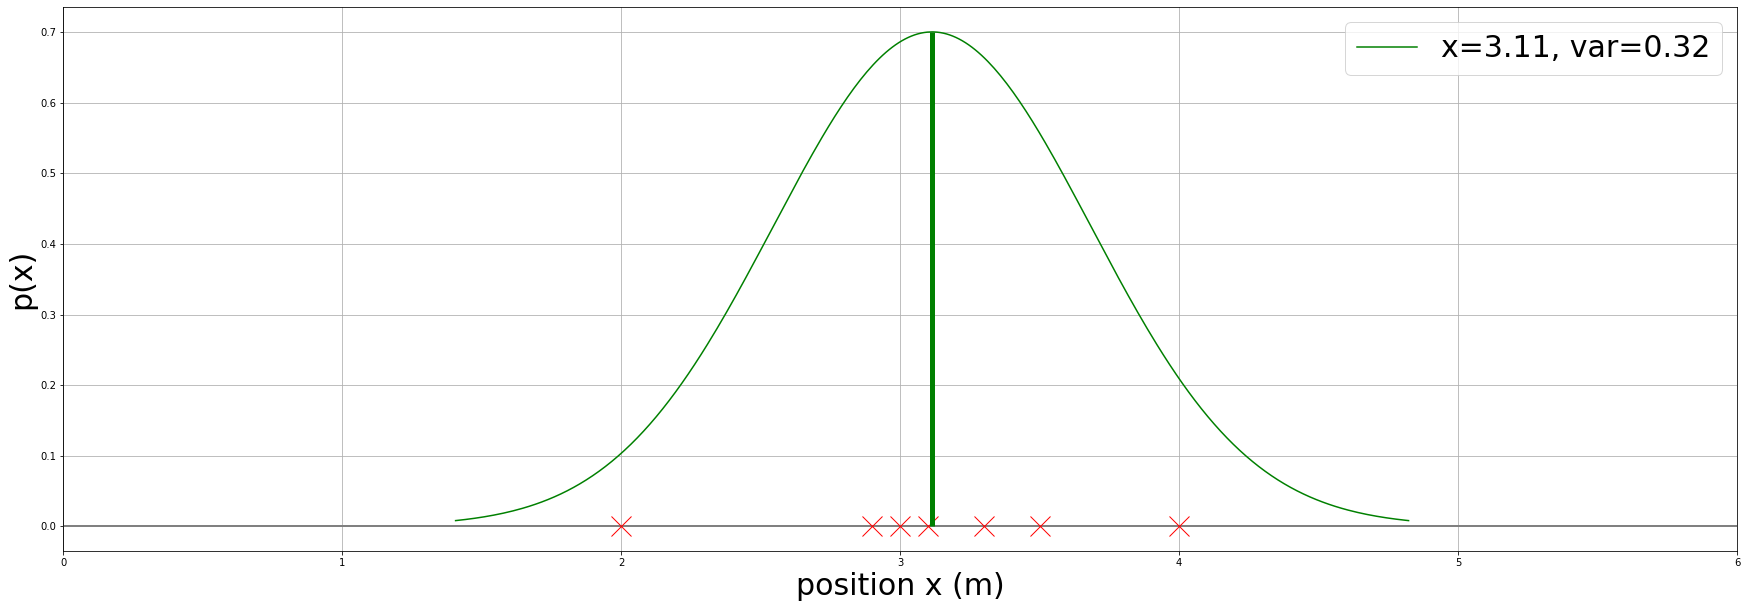

In [64]:
samples = [2.0, 2.1, 1.9, 1.0, 2.5, 2.3, 3.0] # add samples in a list, increased by 2 more samples than before
samples = np.add(samples, 1.) # shift the samples by 1

gaussian = Gaussian(samples) # calculate the mean and covariance out of these samples

fig, ax = make_figure(xlims=(0, 6)) # create figure

ax.plot(samples, np.zeros((len(samples), 1)), 'x', markersize=20, color='red') # plot samples

add_gaussian_bel(ax, gaussian.x, gaussian.P, 'green') # plot gaussian distribution

update_plot()